In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [37]:
ev_path = 'Resources/Clean_EV_Data.csv'
ev_df = pd.read_csv(ev_path)
# ev_df.head()
census_path = 'Resources/2022_census'
cen_df = pd.read_csv(census_path)

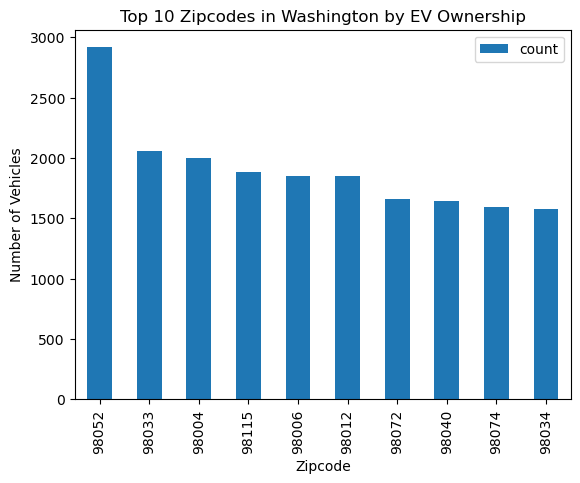

In [38]:
#Ownership by zipcode
zip_count = ev_df['Postal Code'].value_counts()
zip_count_df = pd.DataFrame(zip_count)

#Narrowing DataFrame to only top 10 zipcodes with most EV ownership
zip_df = zip_count_df.nlargest(10,columns=['count'])
zip_df

zip_df.plot(kind='bar',title='Top 10 Zipcodes in Washington by EV Ownership',xlabel='Zipcode',ylabel='Number of Vehicles')

plt.show()

In [66]:
# population by zipcode
cen_df

,Zipcode ID,Census Year,WA Zipcode,Median Household Income,Income Per Capita,Population
1029,1029,2022,98901,55536,25237.0,33106
1030,1030,2022,98237,68929,31650.0,4979
1031,1031,2022,98201,71313,41730.0,30587
1032,1032,2022,98021,155891,67017.0,34993
1033,1033,2022,98203,96351,44288.0,36448
...,...,...,...,...,...,...
1540,1540,2022,99131,34081,31798.0,122
1541,1541,2022,99348,74211,32056.0,1590
1543,1543,2022,98336,76250,30549.0,594
1544,1544,2022,98935,60085,18814.0,4378


In [67]:
# get population and zipcode separated from df
pop_df = cen_df[['WA Zipcode', 'Population']]
sorted_pop = pop_df.sort_values(by='Population', ascending=False)
top_pop_df = sorted_pop.head(10)
# get income and zipcode separated from df
income_df = cen_df[['WA Zipcode', 'Median Household Income']]
sorted_income = income_df.sort_values(by='Median Household Income', ascending=False)
top_income_df = sorted_income.head(10)
#get per capita and zipcode separted from df
pc_df = cen_df[['WA Zipcode','Income Per Capita']]

<BarContainer object of 10 artists>

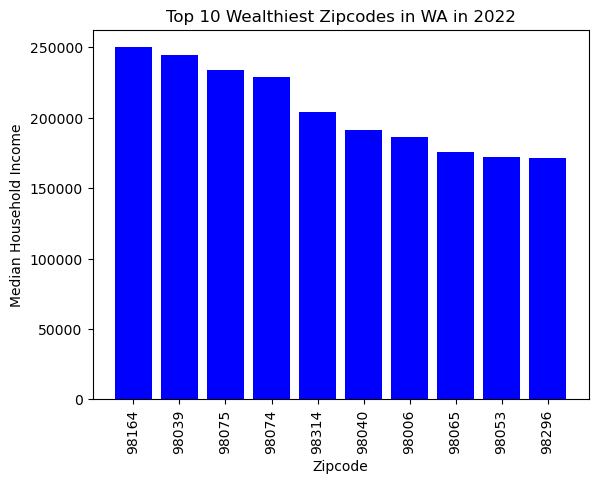

In [68]:
# plot income vs zipcode to find similarities
x_axis = np.arange(len(top_income_df['WA Zipcode']))
income_axis = top_income_df['Median Household Income']
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, top_income_df['WA Zipcode'],rotation='vertical')
plt.title("Top 10 Wealthiest Zipcodes in WA in 2022")
plt.xlabel("Zipcode")
plt.ylabel("Median Household Income")
plt.bar(x_axis, income_axis, color='b')
# plt.show()

**only 98074 are in the top 10 wealthiest and top 10 EV ownership dataframes**

<BarContainer object of 10 artists>

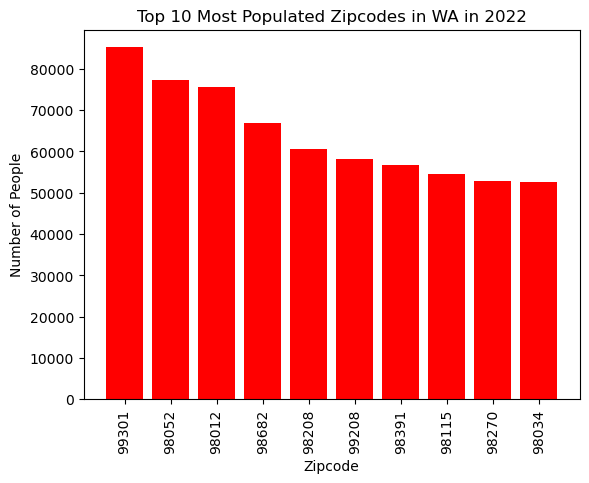

In [69]:
zip_axis = np.arange(len(top_pop_df['WA Zipcode']))
pop_axis = top_pop_df['Population']
tick_locations = [value for value in zip_axis]
plt.xticks(tick_locations, top_pop_df['WA Zipcode'],rotation='vertical')
plt.title("Top 10 Most Populated Zipcodes in WA in 2022")
plt.xlabel("Zipcode")
plt.ylabel("Number of People")
plt.bar(zip_axis, pop_axis, color='r')
# plt.show()

**the zipcodes 98052 and 98115 show up both in the top 10 population and top 10 EV ownership graphs**

In [80]:
# run some linear regression to show if population affects EV ownership
# merge census and EV data in order to compute regression and relationships
cen_df = cen_df.rename(columns={'WA Zipcode':'Postal Code'})
ev_cen = cen_df.merge(ev_df, on='Postal Code').reset_index()
# clean dataframe to include only the columns we are working with
clean_merged_df = ev_cen[['Census Year',
                          'Postal Code',
                          'Population',
                          'Median Household Income',
                          'Income Per Capita',
                          'County',
                          'Make',
                          'Model',
                          'Electric Vehicle Type']]
clean_merged_df

,Census Year,Postal Code,Population,Median Household Income,Income Per Capita,County,Make,Model,Electric Vehicle Type
0,2022,98901,33106,55536,25237.0,Yakima,NISSAN,LEAF,Battery Electric Vehicle (BEV)
1,2022,98901,33106,55536,25237.0,Yakima,TESLA,MODEL 3,Battery Electric Vehicle (BEV)
2,2022,98901,33106,55536,25237.0,Yakima,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV)
3,2022,98901,33106,55536,25237.0,Yakima,TESLA,MODEL 3,Battery Electric Vehicle (BEV)
4,2022,98901,33106,55536,25237.0,Yakima,MERCEDES-BENZ,B-CLASS,Battery Electric Vehicle (BEV)
...,...,...,...,...,...,...,...,...,...
112241,2022,99131,122,34081,31798.0,Stevens,NISSAN,LEAF,Battery Electric Vehicle (BEV)
112242,2022,99348,1590,74211,32056.0,Walla Walla,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV)
112243,2022,98336,594,76250,30549.0,Lewis,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV)
112244,2022,98935,4378,60085,18814.0,Yakima,TESLA,MODEL 3,Battery Electric Vehicle (BEV)


In [143]:
income_list = []
pc_list = []


In [144]:
#make vs income 
make_df = clean_merged_df.groupby('Make').value_counts()
make_df = make_df.reset_index()
all_makes = make_df['Make'].unique()

for make in all_makes:
    make_value = make_df.loc[make_df['Make']==make, :]
    income_list.append(make_value['Median Household Income'].mean())
    pc_list.append(make_value['Income Per Capita'].mean())
    

In [145]:
income_type = []
pc_type = []

In [146]:
# EV type vs income 
type_df = clean_merged_df.groupby('Electric Vehicle Type').value_counts()
type_df = type_df.reset_index()
all_types = type_df['Electric Vehicle Type'].unique()

for car in all_types:
    type_value = type_df.loc[type_df['Electric Vehicle Type']==car, :]
    income_type.append(type_value['Median Household Income'].mean())
    pc_type.append(type_value['Income Per Capita'].mean())

In [148]:
# summary tables
income_avg_make = pd.DataFrame({'Make of EV': all_makes,
                               'Average Median Income': income_list,
                               'Average Per Capita Income': pc_list})
make_summary = income_avg_make.round(decimals=2)
make_summary = make_summary.sort_values(by='Average Median Income')
income_avg_type = pd.DataFrame({'Electric Vehicle Type': all_types,
                              'Average Median Income': income_type,
                               'Average Per Capita Income': pc_type})
type_summary = income_avg_type.round(decimals=2)
type_summary = type_summary.sort_values(by='Average Median Income')
type_summary

,Electric Vehicle Type,Average Median Income,Average Per Capita Income
0,Battery Electric Vehicle (BEV),100357.68,52707.26
1,Plug-in Hybrid Electric Vehicle (PHEV),101187.81,52953.88


ConversionError: Failed to convert value(s) to axis units: ['AUDI', 'AZURE DYNAMICS', 'BENTLEY', 'BMW', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'FIAT', 'FISKER', 'FORD', 'GENESIS', 'HONDA', 'HYUNDAI', 'JAGUAR', 'JEEP', 'KIA', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'LUCID MOTORS', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN', 'POLESTAR', 'PORSCHE', 'RIVIAN', 'SMART', 'SUBARU', 'TESLA', 'TH!NK', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO']

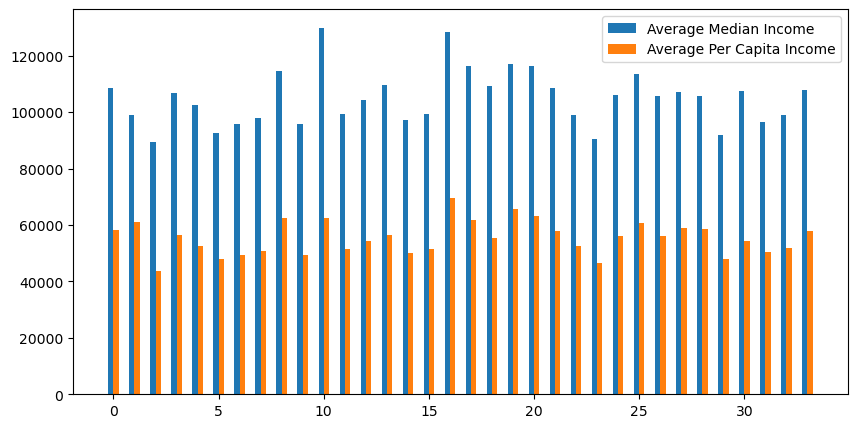